<a href="https://colab.research.google.com/github/kotharisanjana/CMPE255_DataMining_Fall2022/blob/main/Assignment_3/EDA_Advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA of Food Delivery app (Zomato) using plotly**
Dataset - https://www.kaggle.com/datasets/swatikhedekar/eda-on-zomato-dataset

### Installation

In [2]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!gdown 12ixZGdrcwr_c4nVnjVEonFJLiFrbBzsD

Downloading...
From: https://drive.google.com/uc?id=12ixZGdrcwr_c4nVnjVEonFJLiFrbBzsD
To: /content/kaggle.json
100% 65.0/65.0 [00:00<00:00, 191kB/s]


### Imports

In [6]:
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
import plotly.graph_objs as go
from string import Template
import IPython.display as dp

pd.set_option('display.max_columns', None)

In [7]:
od.download('https://www.kaggle.com/datasets/shrutimehta/zomato-restaurants-data')

100%|██████████| 5.47M/5.47M [00:00<00:00, 19.3MB/s]


### Data exploration

In [8]:
data = pd.read_csv('/content/zomato-restaurants-data/zomato.csv', encoding = 'ISO-8859-1')

In [9]:
countries = pd.read_excel('/content/zomato-restaurants-data/Country-Code.xlsx')

In [10]:
data.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [11]:
countries.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [20]:
restaurants = pd.merge(data, countries, how = 'left', on = 'Country Code')

In [21]:
restaurants['Rating color'].unique()

array(['Dark Green', 'Green', 'Yellow', 'Orange', 'White', 'Red'],
      dtype=object)

In [14]:
restaurants.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

'Restaurant ID', 'Address', 'Locality Verbose', 'Country Code', 'Currency', 'Rating Color' and 'Switch to order menu' don't seem particularly useful for analysis.

In [15]:
cols = ['Restaurant Name', 'City', 'Cuisines', 'Rating text', 'Country']

for c in cols:
  print(restaurants[c].value_counts())

Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: Restaurant Name, Length: 7446, dtype: int64
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: City, Length: 141, dtype: int64
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                               

OBSERVATIONS

*   Most of the restaurants occur less than 10 times in the dataset. 
*   Majority of the restaurants are in New Delhi, Gurgaon and Noida.
*   Certain Indian cuisines have most number of records.
*   Majority of the reviews fall in the 'average' category.
*   Finally, this dataset covers Indian restaurants majorly.




### Data cleaning

In [22]:
# Rename column names for consistency

restaurants.rename(lambda x: x.lower().strip().replace(' ', '_'), axis = 'columns', inplace = True)

In [23]:
# Drop unwanted columns

restaurants = restaurants.drop(['restaurant_id', 'address', 'locality_verbose', 'country_code', 'currency', 'switch_to_order_menu', 'rating_color'], axis = 1)

In [24]:
restaurants.columns

Index(['restaurant_name', 'city', 'locality', 'longitude', 'latitude',
       'cuisines', 'average_cost_for_two', 'has_table_booking',
       'has_online_delivery', 'is_delivering_now', 'price_range',
       'aggregate_rating', 'rating_color', 'rating_text', 'votes', 'country'],
      dtype='object')

We will split the visualizations into two-
1. At the global level
2. At Indian level

# Visualization using d3.js

**Hypothesis - Restaurants that are on the higher end of the price spectrum are genrally rated the highest**

In [28]:
s = Template(
    r"""
<style>
  @import url('https://fonts.googleapis.com/css2?family=IBM+Plex+Mono&family=IBM+Plex+Sans&display=swap');

  *,
  *::before,
  *::after {
    box-sizing: border-box;
    margin: 0;
    padding: 0;
  }

  #$id {
    text-align: center;
  }

  #$id .axis.x line {
    display: none;
  }

  #$id .axis text {
    font-weight: bold;
    font-family: 'IBM Plex Mono', monospace;
    text-transform: capitalize;
  }
</style>

<div id="$id"></div>

<script type="module">
  'use strict';
  import * as d3 from 'https://cdn.skypack.dev/d3';
  (async () => {
    const data = d3.csvParse(`$df`, d3.autoType);

    const margin = { top: 40, right: 40, bottom: 40, left: 40 };
    const [w, h] = [500, 300];

    const svg = d3
      .select('#$id')
      .append('svg')
      .attr('width', w)
      .attr('height', h);

    const g = d3.flatRollup(
      data,
      v => d3.mean(v, d => d['aggregate_rating']),
      d => d['price_range']
    );

    const xScale = d3.scaleBand(
      g.map(i => i[0]),
      [margin.left, w - margin.right]
    );
    const yMax = Math.ceil(d3.max(g, i => i[1]) / 10) * 10;
    const yScale = d3.scaleLinear([0, yMax], [h - margin.bottom, margin.top]);

    svg
      .append('g')
      .attr('class', 'axis x')
      .attr('transform', `translate(0, ${h - margin.top})`)
      .call(d3.axisBottom(xScale));
    svg
      .append('g')
      .attr('class', 'axis y')
      .attr('transform', `translate(${margin.left}, 0)`)
      .call(d3.axisLeft(yScale).ticks(7));

    const barWidth = 80;
    svg
      .selectAll('rect')
      .data(g)
      .enter()
      .append('rect')
      .attr('width', barWidth)
      .attr('height', d => h - margin.top - yScale(d[1]))
      .attr('x', d => xScale(d[0]) + xScale.bandwidth() / 2 - barWidth / 2)
      .attr('y', d => yScale(d[1]))
      .attr('fill', '#3182bd')
      .exit()
      .remove();
    svg
      .selectAll('rect')
      .on('mouseenter', function () {
        d3.select(this).transition().duration(300).attr('fill', '#08519c');
      })
      .on('mouseleave', function () {
        d3.select(this).transition().duration(300).attr('fill', '#3182bd');
      });

    svg
      .append('text')
      .text('Average Rating by Price Categories')
      .style('font-family', 'IBM Plex Sans')
      .style('font-weight', 'bold')
      .style('font-size', '1.5rem')
      .attr('x', margin.left / 2)
      .attr('y', margin.top / 2);
    svg
      .append('text')
      .text('Price Buckets')
      .style('font-family', 'IBM Plex Sans')
      .style('font-weight', 'bold')
      .style('font-size', '1.2rem')
      .style('text-anchor', 'middle')
      .attr('x', w / 2)
      .attr('y', h);
    svg
      .append('text')
      .text('Average Rating')
      .style('font-family', 'IBM Plex Sans')
      .style('font-weight', 'bold')
      .style('font-size', '1.2rem')
      .style('text-anchor', 'middle')
      .attr('x', margin.left / 2 - 5)
      .attr('transform', `rotate(-90, ${margin.left / 2 - 5}, ${h / 2})`)
      .attr('y', h / 2);
  })();
</script>
    """
)

dp.HTML(s.safe_substitute({'df': restaurants.to_csv(index=False), 'id': 'g0'}))

# Global visualizations

**Zomato's presence across the world (top 5 countries)**

In [ ]:
restaurants_by_country = restaurants.groupby(['country']).count().reset_index().sort_values(by = ['restaurant_name'], ascending = False)[:5]

fig = px.pie(restaurants_by_country, values = 'restaurant_name', names = 'country', title = 'Restaurants by country')
fig.update_traces(textinfo = 'percent+label')
fig.show()

Our dataset spans Indian restaurants majorly, contributing to 93.2% overall. It is followed by 4.67% restaurants in the Unites States and the by United Kingdom at mere 0.86%.

Since India is the largest market, analysing data from India should give us a pretty accurate representation of the entire data.


**How are people rating restaurants globally?**

In [ ]:
# Ignoring the 0 rating (missing ratings)

df = restaurants[restaurants.aggregate_rating > 0]
fig = px.histogram(df, x = 'aggregate_rating', width = 600, height = 300)
fig.show()

Most of the ratings lie in the average range - 3 to 3.5 globally

**How are the restaurants distrbuted globally?**

In [ ]:
fig = px.scatter_mapbox(restaurants, lat = 'latitude', lon = 'longitude', hover_name = 'city', hover_data = ['restaurant_name'], color_discrete_sequence=["fuchsia"], zoom = 4, height = 300)
fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout(title = 'Restaurants globally', autosize = True, hovermode = 'closest', showlegend = False)
fig.update_layout(autosize = False, width = 1000, height = 500)
fig.show()

**Which cities have restaurants that are rated above 4?**


In [ ]:
high_rating = restaurants[restaurants['aggregate_rating'] >= 4.0]
fig = px.scatter_mapbox(high_rating, lat = 'latitude', lon = 'longitude', hover_name = 'city', hover_data = ['aggregate_rating', 'restaurant_name'], zoom = 4, height = 300)
fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout(title = 'Top rated restaurants in every city', autosize = True, hovermode = 'closest', showlegend = False)
fig.update_layout(autosize = False, width = 1000, height = 500)
fig.show()

**How are the restaurants priced in India and the United States?**

In [ ]:
restaurants_filtered = restaurants[(restaurants.country == 'India') | (restaurants.country == 'United States')]
df = restaurants_filtered.city.value_counts()
cities = list(df[df >= 20].index)

df = restaurants_filtered[restaurants_filtered.city.isin(cities)]

fig = px.sunburst(df, path = ['country', 'city'], color = 'price_range', color_continuous_scale = 'RdBu')
fig.show()


*   In India, for majority of the cities that have 20 or more restaurants, the cost lies the mid-range, i.e. from 2 to 3. Goa is the most costly city for restaurants and Faridabad and New Delhi are the cheaper places. 
*   US restaurants tend to follow a pattern in the lower range, i.e. from 1.5 to 2 in most cities

**Which are the top 5 liked restaurants in every country based on number of votes?**

In [ ]:
restaurants_grouped = restaurants.groupby(['country', 'restaurant_name']).apply(lambda x: x.sort_values(['votes'], ascending = False)).reset_index(drop = True)
top_5_liked = restaurants_grouped.groupby('country').head(5)

fig = px.sunburst(top_5_liked, path = ['country', 'city', 'restaurant_name'], color = 'aggregate_rating')
fig.show()

**Do the rating texts match with the aggregated ratings?**

In [ ]:
restaurants.rating_text.unique()

array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

In [ ]:
ratings_filtered = restaurants[restaurants.rating_text != 'Not rated']
ratings_grouped = ratings_filtered.groupby(['country', 'rating_text']).mean().reset_index()

fig = px.bar(ratings_grouped, x = 'rating_text', y = 'aggregate_rating', color = 'country', barmode = 'group', text = 'country')
fig.show()

The relation between rating_text and aggregate_rating appears to be consistent across the countries.

**Let's look at the restaurants we must go to in every country since they've got the most votes**

In [ ]:
most_voted_restaurants = restaurants.groupby(['country', 'restaurant_name']).apply(lambda x: x.sort_values(['votes'], ascending = False)).reset_index(drop = True)
top_voted_5 = most_voted_restaurants.groupby('country').head(5)

fig = px.scatter(top_voted_5, x = 'votes', y = 'aggregate_rating', size = 'votes', color = 'country', hover_name = 'restaurant_name', log_x = True, size_max = 60)
fig.show()

**Which are the popular cuisines in UK and US that you shouldn't miss out on!**

In [ ]:
countries = ['United States', 'India', 'United Kingdom']

restaurants_filtered_by_country = restaurants[restaurants.country.isin(countries)]
restaurants_filtered_by_country_votes = restaurants_filtered_by_country[(restaurants_filtered_by_country.votes > 200) & (restaurants_filtered_by_country.aggregate_rating > 4)].sort_values(['votes', 'aggregate_rating'], ascending = False)
top_5_most_votes = restaurants_filtered_by_country_votes.groupby('country').head(5)

top_5_most_votes['cuisines'] = top_5_most_votes.cuisines.str.split(',')
top_restaurants = top_5_most_votes.explode('cuisines')

fig = px.icicle(top_restaurants, path = [px.Constant('world'), 'country', 'cuisines', 'restaurant_name'], values = 'votes', width = 1000)
fig.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Visualizations at India level

**Which cusines are more popular in India?**

In [ ]:
india = restaurants[restaurants.country == 'India']

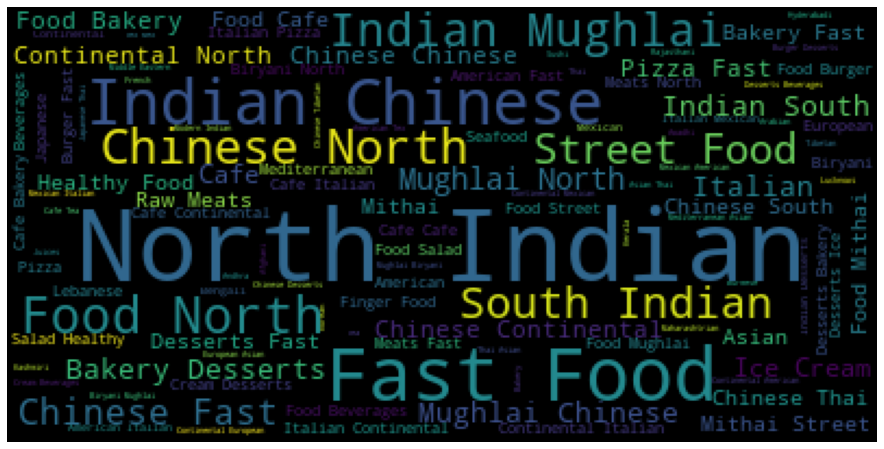

In [ ]:
cuisines = india['cuisines'].str.split(',').str.join('')
cuisines_text = ' '.join(str(c) for c in cuisines.values)

wordcloud = WordCloud().generate(str(cuisines_text))

plt.figure(figsize = (20, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

India loves North Indian, Indian Chinese and Mughlai, and Fast Food the most!

**How is the aggregate_rating related to the number of votes for restaurants in Indian cities?**

In [ ]:
df = india[india.aggregate_rating > 0]
avg_rating_by_city = df.groupby(['city']).agg({'aggregate_rating' : 'mean', 'votes' : 'sum'}).reset_index()

fig = px.scatter(avg_rating_by_city, x = 'aggregate_rating', y = 'votes', size = 'votes', color = 'city', hover_name = 'city', log_x = True, size_max = 60)
fig.show()

If we look closely, restaurants with aggregate_rating above 4 are in the metropolitan cities like Bangalore, Hyderabad, Chennai, Pune, etc. Although, Gurgaon, Delhi and Noida have very large number of votes, the aggregate rating is below 3.

**Let's look at the restaurants (along with their locality and cuisines) with the following features:**
1. **Allow pre-booking**
2. **Rating above 4** 
3. **More than 100 votes on Zomato**

In [ ]:
fine_dine = india[(india.has_table_booking == 'Yes') & (india.aggregate_rating > 4) & (india.votes >= 100)].sort_values('aggregate_rating', ascending = False)
x_ax = fine_dine.head(10)['restaurant_name']
y_ax = fine_dine.head(10)['aggregate_rating']

data = [
    go.Bar(x = x_ax,
          y = y_ax,
          text = fine_dine.head(10)['cuisines'],
          textposition = 'inside',
          marker = dict(color = 'rgb(200, 234, 220)', line = dict(color = 'rgb(8, 48, 107)', width = 1)),
          opacity = 0.6,
          hovertext = fine_dine.head(10)['locality'],
          )
]

layout = go.Layout(title = 'Top fine dine across India (Hover to display the locality of the restaurant)', yaxis = dict(title = 'Rating'), xaxis = dict(title = 'Restaurant'))

fig = go.Figure(data = data, layout = layout)
fig.show()

**Break down of India by city and locality to understand the avergae_cost_for_two by locality (split by north, south, east and west India)**

In [ ]:
north = ['Agra', 'Allahabad', 'Amritsar', ' Bhopal', 'Chandigarh', 'Dehradun', 'Faridabad', 'Ghaziabad', 'Gurgaon', 'Indore', 'Jaipur', 
         'Kanpur', 'Lucknow', 'Ludhiana', 'Mohali', 'New Delhi', 'Noida', 'Panchkula', 'Varanasi']
south = ['Bangalore', 'Chennai', 'Coimbatore', 'Hyderabad', 'Kochi', 'Mangalore', 'Mysore', 'Puducherry', 'Secunderabad', 'Vizag']
east = ['Bhubaneshwar', 'Guwahati', 'Kolkata', 'Patna', 'Ranchi']
west = ['Ahmedabad', 'Aurangabad', 'Goa', 'Mumbai', 'Nagpur', 'Pune', 'Nashik', 'Surat', 'Vadodara']

india_rating = india[india.aggregate_rating > 0]

In [ ]:
north_india = india[india.city.isin(north)]
fig = px.treemap(north_india, path=[px.Constant('North India'), 'city', 'locality'], values = 'average_cost_for_two', color_continuous_scale='RdBu')
fig.show()

In [ ]:
south_india = india[india.city.isin(south)]
fig = px.treemap(south_india, path=[px.Constant('South India'), 'city', 'locality'], values = 'average_cost_for_two', color_continuous_scale='RdBu')
fig.show()

In [ ]:
east_india = india[india.city.isin(east)]
fig = px.treemap(east_india, path=[px.Constant('East India'), 'city', 'locality'], values = 'average_cost_for_two', color_continuous_scale='RdBu')
fig.show()

In [ ]:
west_india = india[india.city.isin(west)]
fig = px.treemap(west_india, path=[px.Constant('West India'), 'city', 'locality', 'restaurant_name'], values = 'average_cost_for_two', color_continuous_scale='RdBu')
fig.show()

The treemaps show the average_cost_for_two_people by locality in differnet cities in India.

In [ ]:
india_restaurant_pricerange = india.groupby(['city'])['price_range'].mean()
india_restaurant_pricerange

city
Agra            2.650000
Ahmedabad       2.571429
Allahabad       2.650000
Amritsar        1.809524
Aurangabad      2.200000
Bangalore       2.700000
Bhopal          2.150000
Bhubaneshwar    1.857143
Chandigarh      2.500000
Chennai         2.450000
Coimbatore      2.400000
Dehradun        3.050000
Faridabad       1.454183
Ghaziabad       1.800000
Goa             3.650000
Gurgaon         1.855993
Guwahati        2.523810
Hyderabad       2.888889
Indore          2.750000
Jaipur          2.850000
Kanpur          2.700000
Kochi           2.050000
Kolkata         2.850000
Lucknow         2.571429
Ludhiana        2.650000
Mangalore       2.500000
Mohali          2.000000
Mumbai          2.750000
Mysore          2.450000
Nagpur          2.300000
Nashik          2.800000
New Delhi       1.621597
Noida           1.601852
Panchkula       4.000000
Patna           2.450000
Puducherry      3.000000
Pune            2.950000
Ranchi          2.050000
Secunderabad    2.000000
Surat           2.65

**Which city is expensive/slightly higher priced than other ciites?**

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x = india_restaurant_pricerange.values,
    y = india_restaurant_pricerange.index,
    marker = dict(
        color = 'rgba(102, 102, 102, 0.95)',
        line_color = 'rgba(156, 165, 196, 1.0)',
    )
))

fig.update_layout(
    title = 'Average price range by city',
    width = 1000,
    height = 500,
    plot_bgcolor = 'white',
)

fig.update_traces(mode = 'markers', marker = dict(line_width = 1, symbol = 'circle', size = 16))
fig.show()

The dots show that for most of the cities, the avergae price range falls between 2 and 3. Goa is the highest in terms of price_range and Faridabad is the lowest.

In [ ]:
india.city.value_counts(normalize = True)

New Delhi       0.632571
Gurgaon         0.129219
Noida           0.124827
Faridabad       0.029011
Ghaziabad       0.002890
Ahmedabad       0.002427
Guwahati        0.002427
Lucknow         0.002427
Bhubaneshwar    0.002427
Amritsar        0.002427
Pune            0.002312
Puducherry      0.002312
Patna           0.002312
Ludhiana        0.002312
Ranchi          0.002312
Surat           0.002312
Vadodara        0.002312
Nashik          0.002312
Nagpur          0.002312
Mysore          0.002312
Mumbai          0.002312
Varanasi        0.002312
Mangalore       0.002312
Agra            0.002312
Kochi           0.002312
Kolkata         0.002312
Dehradun        0.002312
Allahabad       0.002312
Aurangabad      0.002312
Bangalore       0.002312
Bhopal          0.002312
Chennai         0.002312
Coimbatore      0.002312
Goa             0.002312
Indore          0.002312
Jaipur          0.002312
Kanpur          0.002312
Vizag           0.002312
Chandigarh      0.002080
Hyderabad       0.002080


87% of the restaurants covered in India are in Delhi, Gurgaon and Noida.

**Which is the most preferred cusine in these 3 cities?**



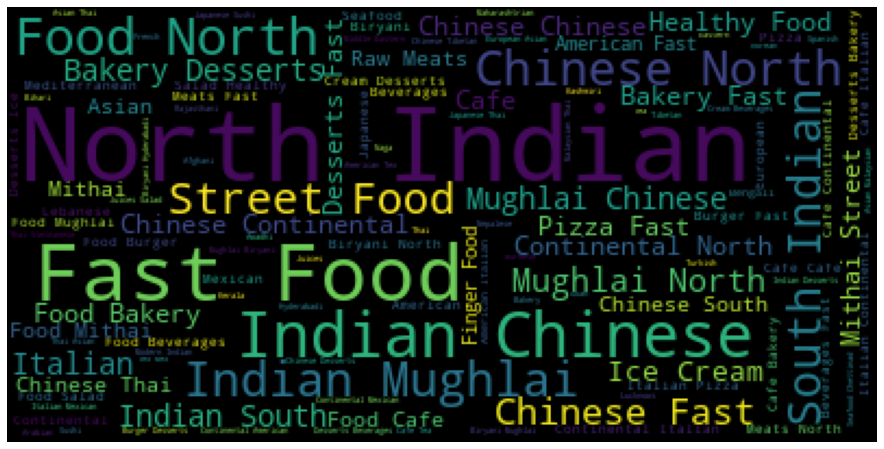

In [ ]:
indian_cities = ['New Delhi', 'Noida', 'Gurgaon']

restaurants_cities = india[india.city.isin(indian_cities)]
cuisines = restaurants_cities['cuisines'].str.split(',').str.join('')
cuisines_text = ' '.join(str(c) for c in cuisines.values)

wordcloud = WordCloud().generate(str(cuisines_text))

plt.figure(figsize = (20, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

North Indian food is among the top choices of people in Delhi, Noida and Gurgaon. 

**Locate restaurants that offer North Indian in these 3 cities**

In [ ]:
indian_cities = ['New Delhi', 'Noida', 'Gurgaon']

north_india_restaurants = india[(india.city.isin(indian_cities)) & (india.cuisines == 'North Indian')]

fig = px.scatter_mapbox(north_india_restaurants, lat = 'latitude', lon = 'longitude', hover_name = 'city', hover_data = ['restaurant_name'], color_discrete_sequence = ['fuchsia'], 
                        zoom = 6, height = 500)
fig.update_layout(mapbox_style = "open-street-map")
fig.update_layout(title = 'North Indian Cuisines in Delhi, Noida and Gurgaon')
fig.update_layout(width = 800, height = 500,)
fig.show()